# Tiq Taq Toq

*by [Afrad Muhamed Basheer](Afrad.M.Basheer@student.uts.edu.au)* 

*contact: Afrad.M.Basheer@student.uts.edu.au*

*Team: Entanglement*

*Poster Link: https://drive.google.com/file/d/1QErZT5G0u_JxoWZJiMJi1vXe5ftnAdPD/view?usp=sharing*

Introducing Tiq Tac Toq, the tic tac toe game meant to be played on quantum computers. Analgous to the "classical" Tic Tac Toe game, Tiq Tac Toq also requires players to "mark" one spot in a 3 x 3 grid, where each spot is represented by 1 qubit, by applying a gate from a pre-defined set of gates. Once all gates are applied, we measure all 9 qubits, and the resulting board, with '1's and '0's is analyzed in the same way a normal Tic Tac Toe game is analyzed; horizontal,  vertical and diagonal patterns results in points for the players. Some additional constraints and features are also incorporated to increase the "coherence" of the game. We provide implementation of the game in both Qiskit as well as TheQ.

# Rules


1. We shall refer to both the players as player 0 and player 1. As we menttioned earlier, each square of the 3 x 3 grid is represented by a single qubit. Players take turn to mark a square by applying a gate on the qubit. After all gates are applied, we measure all 9 qubits. The resultant board of 9 qubits in the 0 or 1 state, is the final state of the board. Player 0 gains points for each winning pattern of 0's on the board, that is, three 0's aligned vertically, horizontally or diagonally. Same goes for player 1 as well. Note that no player can choose to mark a qubit which is already marked, just like a normal tic-tac-toe.

2. Before the game starts, one pair of qubits, randomly chosen without the players' knowldege, are chosen to be entangled. Let's call them control qubit and target qubit. The idea is to construct the final quantum circuit in such a manner that if the control qubit results in 0 after measurement, the target qubit also results in 0 and same should happen for 1. 
3. Each qubit is indexed in the following manner. 


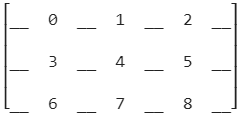
4. Every qubit, except the target qubit, will be initialized in the $|+\rangle$ state. Since the players do not know which qubit is the target qubit, from their perspective, every qubit is initialized in the $|+\rangle$ state.
5. Each player gets to choose a square/qubit to apply a $\mathbf{R_Y}(2 \theta)$ rotation gate. The $\mathbf{R_Y}(\theta)$ gate has the form 
\begin{equation}
  \mathbf{R_Y}(\theta) = 
  \begin{bmatrix}
    cos(\frac{\theta}{2}) & -sin(\frac{\theta}{2}) \\
    sin(\frac{\theta}{2}) & cos(\frac{\theta}{2}) 
  \end{bmatrix}
\end{equation}
Hence, for any rotation angle $\theta > 0$, $\mathbf{R_Y}(2\theta)$ rotates a vector by angle $\theta$ in the counter-clockwise direction on an x-y plane, and for any rotation angle $\theta < 0$, $\mathbf{R_Y}(2\theta)$ rotates a vector by angle $\theta$ in the clockwise direction on an x-y plane. Note that, from the players' perspectives, all qubits are initialized in the $| + \rangle$ state, which is equal to $\frac{1}{\sqrt{2}} |0 \rangle + \frac{1}{\sqrt{2}} |1 \rangle$ or $\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$. So, on the first quadrant of an x-y plane, all qubits are represented by the point $(\frac{1}{\sqrt{2}}, \frac{1}{\sqrt{2}})$, which is situated at $\frac{\pi}{4}$ radian from the x-axis.

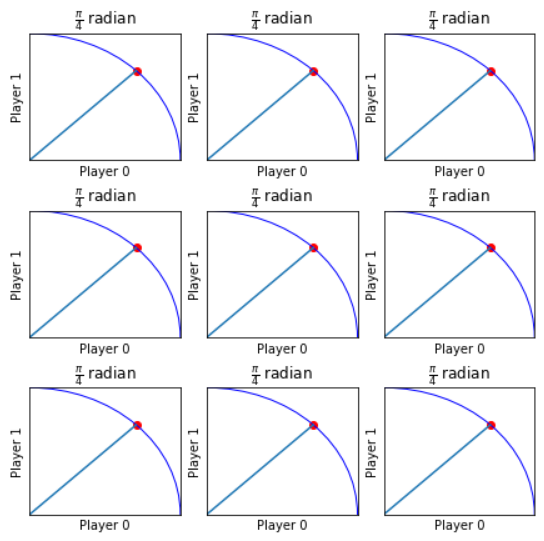

  The rotation angle $\theta$ should be one of 0, $\frac{\pi}{4}$, $\frac{\pi}{8}$, $\frac{\pi}{16}$. The states are represented in the first quadrant of an x-y plane, that is, a state 
\begin{equation}
  | \phi \rangle = a_0 | 0 \rangle + a_1 | 1 \rangle
\end{equation}
   where $a_0, a_1 \geq 0$, is represented by the point $(a_0, a_1)$. So $|0\rangle$ is $(1, 0)$ and $|1\rangle$ is $(0, 1)$. Player 0 would like to rotate the vector downwards (towards $x$-axis) and player 1 would like to rotate the vector upwards (towards $y$-axis). This means that for player 0, an input choice of $\theta$ would result in applying a gate $\mathbf{R_Y}(-2\theta)$ and for player 1, an input choice of $\theta$ would result in applying the gate $\mathbf{R_Y}(2\theta)$. 
  

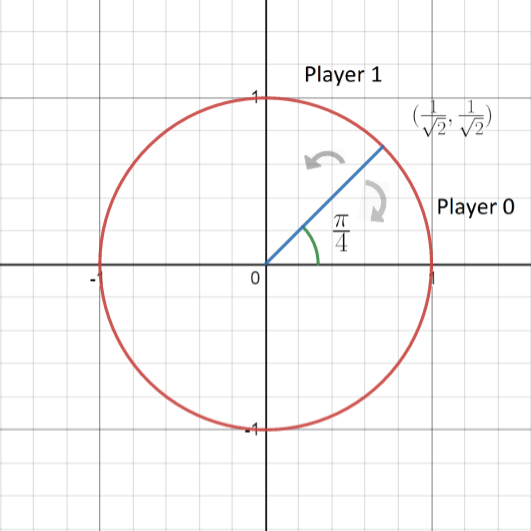


  Now we explain the reason why both players rotate in this manner. The closer the state of the qubit gets to the $x$-axis, the $x$ coordinate of the state would become more and more greater than the $y$ coordinate of the state and hence, the amplitude associated with $| 0 \rangle$ would be higher compared to the amplitude associated with $| 1 \rangle$. This would imply that the probability of the qubit being marked 0 after measurement is higher than the probability of the qubit being marked 1. Similarly, the closer the state of the qubit gets to the $y$-axis, the probability of the qubit being marked 1 after measurement is higher than the probability of the qubit being marked 0. An example of a board with gates applied to all qubits is given below.

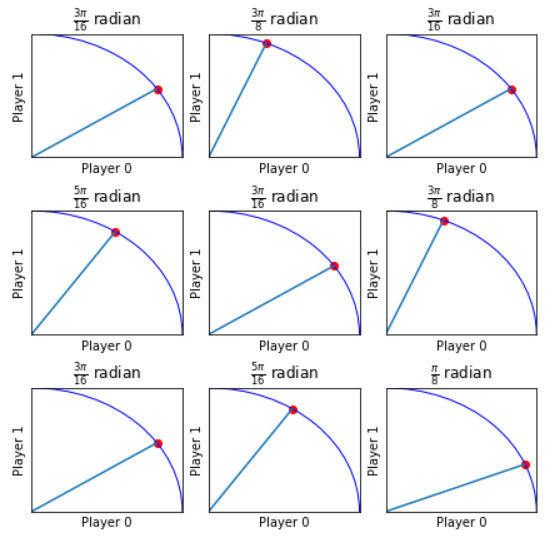
  
  Here, player 0 has played in even indexed qubits and player 1 has played in odd indexed qubits. 


4. Throughout one round, the sum of rotation angles one player can apply is capped at $\frac{\pi}{2}$. This forces players to strategically apply rotations on qubits. For example, from a player's perspective, a $\frac{\pi}{4}$ rotation on any qubit completely guarantees that qubit for the player. But, because of this restriction, players can only do two such rotations per round, and even if one does that, then that player cannot rotate any other qubit to any degree throughout the round. After each move a player makes, their remaining angle usage will be displayed.

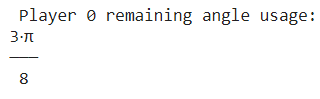

5. Now, as we discussed before, player 0 would like to increase the amplitude of $| 0 \rangle$ and player 1 would like to increase the amplitude of $|1\rangle$. We bring an extra feature by allowing each player to choose one qubit/square to apply an $\mathbf{X}$ gate, just before the round starts. Players don't know what the opponent's choice of $\mathbf{X}$ gate qubit is. The $\mathbf{X}$ gate is applied after all the rotation gates are applied. So, on the qubit that a player has chosen to apply an $\mathbf{X}$ gate, the amplitudes get interchanged. For example, let the qubit be in state 
\begin{equation}
  | \phi \rangle = a_0 | 0 \rangle + a_1 | 1 \rangle
\end{equation}
where $a_0 > a_1 \geq 0$. So, the probability of the qubit being marked 0 after the final measurement is higher than the probability of the qubit being marked 1. But, after applying an $\mathbf{X}$ gate, the state becomes
\begin{equation}
  \mathbf{X} | \phi \rangle = a_0 |1\rangle + a_1 |0\rangle
\end{equation}
  Now, we see that the probability of the qubit being marked 1 after the final measurement is higher than the probability of the qubit being marked 0. So, $\mathbf{X}$ gate is like a mine. When a player tries to increase the probability for their mark on a qubit which their opponent has decided to apply an $\mathbf{X}$ gate in, they are actually decreasing that probability. 
6. After all squares are marked with rotations, we move on to the quantum circuit.
7. First we apply Hadamard gates on all qubits except the target qubit.
8. Then we apply all the chosen rotation gates on the chosen qubits, except for target qubit.
9. Then we apply the $\mathbf{X}$ gates, if it is not on the target qubit. If it is, we don't apply that $\mathbf{X}$ gate.
10. Then we apply a CNOT gate with the control qubit as control and target qubit as target. Now whatever is the result of the control qubit after measurement, the target qubit will also have the same result. For example, let the control qubit $|ctrl \rangle$ be in the state $a_0 | 0 \rangle + a_1 | 1 \rangle$, then, since no gates are applied to the target qubit $| tar \rangle$, both of these qubits can be represented as

\begin{equation}
\begin{split}
  | ctrl \rangle \otimes |tar \rangle &= (a_0 | 0 \rangle + a_1 | 1 \rangle) \otimes | 0 \rangle \\
  &= a_0 | 00 \rangle + a_1 | 10 \rangle
  \end{split}
\end{equation}

  Now, after applying the CNOT gate, we get

\begin{equation}
  CNOT | ctrl \rangle \otimes | tar \rangle = a_0 | 00 \rangle + a_1 | 11 \rangle
\end{equation}

  Therefore, the CNOT forces the target qubit to have the same result as the control qubit. An example of a final circuit, with qubit 0 being the control qubit and qubit 8 being the target qubit, will look like this.


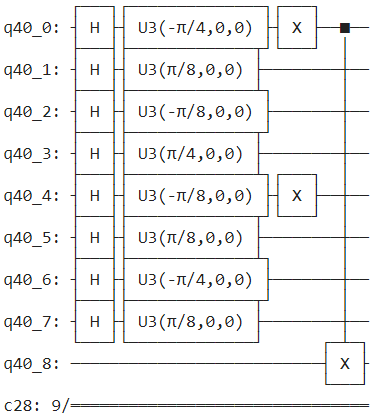
11. Then we measure all the qubits. Each player gets 1 point for 1 winning pattern on the board. For example:


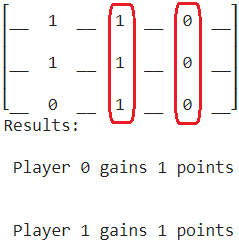
12. Players play 4 rounds with the same 2 qubits chosen for entanglement with CNOT gates. So, based on the results of each round, players have to figure out which qubits are entangled and try to take advantage of it. Player 0 plays first in the even rounds and player 1 plays first in the odd rounds.



# Qiskit Installation

Run the cell below to install qiskit, if you haven't yet. If you plan to play the game on TheQ, ignore this.

In [ ]:
!pip install qiskit --quiet
from qiskit import *

# Import required packages

In [ ]:
# This is first cell to run before executing the game.

import numpy as np
import random
import getpass
import sympy as sp
from sympy.abc import pi, x
from sympy import symbols
import math
import matplotlib as mpl

# Some required functions

In [ ]:
# This is the second cell required to run before executing the game.

# The divisor functions helps in displaying the board after each move.

def divisor(index, val, choices):
  if index not in choices:
    return x
  elif val == 0:
    return 0
  else:
    return (val).as_integer_ratio()[0] * pi/(val).as_integer_ratio()[1]
    

# This function is required to receive input from players

def get_player_input(player, player_limit, chosen_qubits):
    player_qubit = input("\n Enter qubit for player %d [0-8]\n" % player)
    
    # Check for exit or bad moves
    if player_qubit == 'exit':
      return ('exit',0)
    elif int(player_qubit) in chosen_qubits:
      print('\n Chosen qubit is already marked. Please choose a differnet qubit! \n')
      return get_player_input(player, player_limit, chosen_qubits)
    elif int(player_qubit) not in list(range(9)):
      print('\n Please chose an integer [0-8] or type "exit" \n')
      return get_player_input(player, player_limit, chosen_qubits)
    else:
      player_qubit = int(player_qubit)
      player_good_theta = False
      while not player_good_theta:

         player_choice = input("\n Player %d enter theta: \n 0 for 0 rad,\n 4 for π/4 rad, \n 8 for π/8 rad, \n 16 for π/16 rad, \n Enter 'exit' to stop the game and see measurement results. \n" %player)
         if player_choice not in ['0','4','8','16','exit']:
            print ('wrong theta, please chose from {0,4,8,16,exit}')
         elif player_choice == 'exit':
            return ('exit',0)
         else:
            player_choice = int(player_choice)
            if player_choice == 0:
               player_good_theta = True
            elif player_limit + 1/player_choice <= 1/2:
               player_good_theta = True
            else:
              print("\n Maximum angle exceeded \n")
              print("\n Player {} remaining angle usage: ".format(player))
              if 0.5 - player_limit == 0:
                sp.pprint(0)
              else:
                sp.pprint((0.5 - player_limit).as_integer_ratio()[0] * pi/(0.5 - player_limit).as_integer_ratio()[1])
    return (player_qubit,player_choice)
    

# This funciton is used to display the angles as plots on the first quadrant.
def rot_graph(thetas):
  pi0 = np.pi
  ori = [0,0]
  thet = thetas
  thetas = [x * pi0 for x in thetas]

  fig = mpl.pyplot.figure(figsize = (6,6),constrained_layout=True)

  for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    circ = mpl.pyplot.Circle((0, 0), radius=1, edgecolor='b', facecolor='None')
    th = thetas[i]
    th1 = (thet[i]).as_integer_ratio()[0]
    th2 = (thet[i]).as_integer_ratio()[1]
    if th1 == 1:
      a = r'\frac{\pi}{%d}' %th2
    else:
      a = r'\frac{%d\pi}{%d}' %(th1 ,th2)
    col = 'r'
    pts = mpl.pyplot.scatter(np.cos(th), np.sin(th), color = col)
    xy =[np.cos(th), np.sin(th)]
    mpl.pyplot.plot([0,np.cos(th)], [0,np.sin(th)])
    ax.add_patch(circ)
    mpl.pyplot.xlim(0, 1)
    mpl.pyplot.ylim(0, 1)
    mpl.pyplot.title("$%s$ radian" %a)
    mpl.pyplot.xticks([])
    mpl.pyplot.yticks([])
    mpl.pyplot.xlabel("Player 0")
    mpl.pyplot.ylabel("Player 1")
  fig.tight_layout(pad=0.7)
  mpl.pyplot.show()

## Let's start the game

In [ ]:
# Run this cell to play the game. 


# Generate a random pair of qubits to be entangled
r1 = np.random.randint(9)
r2 = np.random.randint(9)
while r1 == r2:
  r2 = np.random.randint(9)
  
# Uncomment the line below to see which qubits are entangled. In the real game, this will not be shown to the players.
#print("Control aubit: {} \nTarget qubit: {}".format(r1, r2))

# Dsiplay the board with indices of the qubits
print("\n Index of the qubits \n \n ")
sp.pprint(sp.Matrix([['____', 0, '____', 1, '____', 2, '____'], 
          ['____', 3, '____', 4, '____', 5, '____'], 
          ['____', 6, '____', 7, '____', 8, '____']]))

# Initialize the scores
player_scores = [0, 0]

# The game runs for only 4 rounds. 
for round in range(4):

  # Initialize the quantumand classical registers
  qr = QuantumRegister(9)
  cr = ClassicalRegister(9)
  qc = QuantumCircuit(qr, cr)

  # Apply Hadamard gates on all qubits except target qubit to initialize them to the "+" state
  for i in range(9):
    if i != r2:
      qc.h(i)

  # Some more required initializaions 
  chosen_qubits = []
  limit0 = 0
  limit1 = 0
  print("\n Round: {}".format(round + 1))
  board_values = [1/4] * 9
  x = symbols('+')
  # Display the initial state of the board
  print("\n\n\n Initial state of the board \n \n")
  sp.pprint(sp.Matrix([['____', divisor(0, board_values[0], chosen_qubits), '____', divisor(1, board_values[1], chosen_qubits), '____', divisor(2, board_values[2], chosen_qubits), '____'], 
            ['____', divisor(3, board_values[3], chosen_qubits), '____', divisor(4, board_values[4], chosen_qubits), '____', divisor(5, board_values[5], chosen_qubits), '____'], 
            ['____', divisor(6, board_values[6], chosen_qubits), '____', divisor(7, board_values[7], chosen_qubits), '____', divisor(8, board_values[8], chosen_qubits), '____']]))

  rot_graph([1/4] * 9)

  # Players input where to apply an X gate
  X_gate0 = getpass.getpass(prompt = "\n Player {}, Enter qubit for X gate [0-8]".format(round % 2))
  X_gate1 = getpass.getpass(prompt = "\n Player {}, Enter qubit for X gate [0-8]".format((round + 1) % 2))


  # Only 9 squares in total. So only 9 moves allowed in each round.
  while len(chosen_qubits) <= 9:
    #print (chosen_qubits)

    # Take the first player's move for rotation target
    (player0_qubit, player0_choice) = get_player_input(round % 2, limit0, chosen_qubits)
    
    # Check for exit
    if player0_qubit == 'exit':
      break    
    
    # If rotated then increase the used rotation for the first player
    if player0_choice in [0,4,8,16]:
      if player0_choice != 0:
        limit0 += 1/player0_choice
        board_values[player0_qubit] = (board_values[player0_qubit] + (((-1) ** (round + 1)) * (1/player0_choice)))
    
    # Record which square was played
    chosen_qubits.append(player0_qubit)
    
    sp.pprint(sp.Matrix([['____', divisor(0, board_values[0], chosen_qubits), '____', divisor(1, board_values[1], chosen_qubits), '____', divisor(2, board_values[2], chosen_qubits), '____'], 
                      ['____', divisor(3, board_values[3], chosen_qubits), '____', divisor(4, board_values[4], chosen_qubits), '____', divisor(5, board_values[5], chosen_qubits), '____'], 
                      ['____', divisor(6, board_values[6], chosen_qubits), '____', divisor(7, board_values[7], chosen_qubits), '____', divisor(8, board_values[8], chosen_qubits), '____']]))
    rot_graph(board_values)

    # Display remaining angle usage 

    sp.pprint("\n Player {} remaining angle usage: ".format(round % 2))
    if 0.5 - limit0 == 0:
      sp.pprint(0)
    else:
      sp.pprint((0.5 - limit0).as_integer_ratio()[0] * pi/(0.5 - limit0).as_integer_ratio()[1])

    # Apply rotation
    if player0_qubit != r2 and player0_choice!=0:
      qc.u3( ((-1) ** (round + 1)) * 2 * math.pi/player0_choice, 0, 0, player0_qubit)

    
    if len(chosen_qubits) == 9:
      break

    # Take second player's move for rotation target
    (player1_qubit, player1_choice) = get_player_input((round + 1) % 2, limit1, chosen_qubits)

    # Check for exit
    if player1_qubit == 'exit':
      break    
    
    # If rotated then increase the used roatation
    if player1_choice in [0,4,8,16]:
      if player1_choice != 0:
        limit1 += 1/player1_choice
        board_values[player1_qubit] = (board_values[player1_qubit] + (((-1) ** (round)) * (1/player1_choice)))

    # Record which square was played
    chosen_qubits.append(player1_qubit)
    
    sp.pprint(sp.Matrix([['____', divisor(0, board_values[0], chosen_qubits), '____', divisor(1, board_values[1], chosen_qubits), '____', divisor(2, board_values[2], chosen_qubits), '____'], 
                      ['____', divisor(3, board_values[3], chosen_qubits), '____', divisor(4, board_values[4], chosen_qubits), '____', divisor(5, board_values[5], chosen_qubits), '____'], 
                      ['____', divisor(6, board_values[6], chosen_qubits), '____', divisor(7, board_values[7], chosen_qubits), '____', divisor(8, board_values[8], chosen_qubits), '____']]))
    rot_graph(board_values)

    # Apply rotation
    print("\n Player {} remaining angle usage:".format((round + 1) % 2))
    if 0.5 - limit1 == 0:
      sp.pprint(0)
    else:
      sp.pprint((0.5 - limit1).as_integer_ratio()[0] * pi/(0.5 - limit1).as_integer_ratio()[1])
    
    if player1_qubit != r2 and player1_choice!=0:
      qc.u3(((-1) ** (round)) * 2 * math.pi/player1_choice, 0, 0, player1_qubit)

  # Apply CNOT and X gates
  
  if X_gate0 != r2:
    qc.x(int(X_gate0))

  if X_gate1 != r2:
    qc.x(int(X_gate1))
  qc.cx(r1, r2)

  # Display circuit. This part is currently commented because in a normal game, the circuit should not be displayed as it will reveal the location of the CNOT gate. 
  # But if one wants to see the circuit, just uncomnnent the 2 lines below.

  #print("The Circuit \n \n")
  #print(qc.draw())
  

  # Run quantum simulation
  qc.measure(qr, cr)
  backend = Aer.get_backend('qasm_simulator')

  
  job_sim = execute(qc, backend, shots = 1)
  sim_result = job_sim.result()
  counts = sim_result.get_counts(qc)
  for key in counts:
    results = key

  # Display results of measured board (1's and 0's)
  print("Result \n")
  sp.pprint(sp.Matrix([['____', results[8], '____', results[7], '____', results[6], '____'], 
                      ['____', results[5], '____', results[4], '____', results[3], '____'], 
                      ['____', results[2], '____', results[1], '____', results[0], '____']]))
  results = list(results)
  print ("Results:")
  
  res = []
  for rex_x in results:
    res.append(int(rex_x))
  results = res
  results.reverse()
  res_mat = np.reshape(np.array(results), (3, 3))

  # Update scores from measured board

  player0_score_temp = 0
  player1_score_temp = 0
  for i in range(3):
    if len(set(res_mat[i,:])) == 1:
      if res_mat[i,0] == (round % 2):
        player0_score_temp += 1
      else:
        player1_score_temp += 1
  for i in range(3):
    if len(set(res_mat[:,i])) == 1:
      if res_mat[0, i] == (round % 2):
        player0_score_temp += 1
      else:
        player1_score_temp += 1
  if len(set([res_mat[0, 0], res_mat[1, 1], res_mat[2, 2]])) == 1:
    if res_mat[0, 0] == (round % 2):
      player0_score_temp += 1
    else:
      player1_score_temp += 1

  if len(set([res_mat[0, 2], res_mat[1, 1], res_mat[2, 0]])) == 1:
    if res_mat[1, 1] == (round % 2):
      player0_score_temp += 1
    else:
      player1_score_temp += 1
  
  # Print score updates
  print("\n Player {} gains {} points\n".format(round % 2, player0_score_temp))
  print("\n Player {} gains {} points\n".format((round + 1)% 2, player1_score_temp))
  player_scores[round % 2] += player0_score_temp
  player_scores[(round + 1) % 2] += player1_score_temp
  print("\n Player 0's current score is {} points\n".format(player_scores[0]))
  print("\n Player 1's current score is {} points\n".format(player_scores[1]))

#End of all rounds display. Printing final scores and deciding the winner
if player_scores[0] > player_scores[1]:
  print("\n Player 0 wins. \n")
elif player_scores[0] < player_scores[1]:
  print("\n Player 1 wins. \n")
else:
  print("\n Draw \n")
print("\n Player 0's score {} \n".format(player_scores[0]))
print("\n Player 1's score {} \n".format(player_scores[1]))

# Play Tiq-Taq-Toq on TheQ

In this section, we present the required code to play Tiq-Taq-Toq on TheQ.

## Required functions for simulating quantum circuits on TheQ.

In [ ]:
# Server addresses should be stable, but may occasionally be offline
import requests
import json
import math
from google.colab import files
#req_str = 'http://8b851bd5c0ec.ngrok.io/qsim/perform_operation'
req_str = 'http://8fc11588c850.ngrok.io/qsim/perform_operation'
#req_str_qasm = 'http://8b851bd5c0ec.ngrok.io/qsim/qasm'
req_str_qasm = 'http://8fc11588c850.ngrok.io/qsim/qasm'
# Define Create ciruit (these are the four core definitions for any circuit)
# all circuits must be bookmarked by the create_circuit and destroy_circuit command

# Initial_state is a binary integer to initalise all qubit, 
# most often initial_state=0.
def create_circuit(qubits,initial_state):
    data = {
        'operation': 'create_circuit',
        'num_qubits': qubits
    }
    result = requests.post(req_str, json=data)
    json_obj = json.loads(result.content)
    reg_id = json_obj['result']

    data = {
        'operation': 'set_state',
        'register': reg_id,
        'state': initial_state,
        'complex_value': {'re': 1, 'im': 0}
    }
    result = requests.post(req_str, json=data)
    return reg_id

# Gates.  gate_name and params are specified from the list above
def gate(register_id, gate_name, params):
    data = {
        'operation': 'gate',
        'register': register_id,
        'gate': gate_name
    }
    for k in params.keys():
        data[k] = params[k]
    result = requests.post(req_str, json=data)
    json_obj=json.loads(result.content)
    return json_obj['result']

# params contain an array of qubit numbers to measure, 'lq2m': [0,1,3] would measure qubits 0, 1 and 3 and return the 
# corresponding 3-bit integer value from 0 to 7.
def measure_qubit(register_id, params):
    data = {
        'operation': 'measure', 
        'register': register_id,
    }
    for k in params.keys():
        data[k] = params[k]
    result = requests.post(req_str, json=data)

    json_obj = json.loads(result.content)
    return json_obj['result']

# Always call destroy_circuit to terminate simulation (turn off your QC)
def destroy_circuit(register_id):
  data = {
        'operation': 'destroy_circuit', 
        'register': register_id
  }
  result = requests.post(req_str, json=data)

# Print allows you to output the current computational state of the machine.
def print_vector(register_id):
  data = {
        'operation': 'state_vector', 
        'register': register_id
  }
  result = requests.post(req_str, json=data)
  json_obj = json.loads(result.content)
  return json_obj['result']


## Let's play Tiq-Taq-Toq on TheQ

In [ ]:
# Run this cell to play the game. 

# Generate a random pair of qubits to be entangled
r1 = np.random.randint(9)
r2 = np.random.randint(9)
while r1 == r2:
  r2 = np.random.randint(9)

# Uncomment the line below to see which qubits are entangled. In the real game, this will not be shown to the players.
#print("Control aubit: {} \nTarget qubit: {}".format(r1, r2))

# Display the indices of the qubits on the board
print("\n Index of the qubits \n \n ")
sp.pprint(sp.Matrix([['____', 0, '____', 1, '____', 2, '____'], 
          ['____', 3, '____', 4, '____', 5, '____'], 
          ['____', 6, '____', 7, '____', 8, '____']]))

# Initialize the scores
player_scores = [0, 0]

# The game runs for only 4 rounds. 
for round in range(4):

  # Initialize the quantum circuit
  reg_id = create_circuit(9,0)

  # Apply Hadamard gates on all qubits except target qubit to initialize them to the "+" state
  for i in range(9):
    if i != r2:
      gate(reg_id, 'hadamard', {'q': i})

  # Some more required initializaions 
  chosen_qubits = []
  limit0 = 0
  limit1 = 0
  print("\n Round: {}".format(round + 1))
  board_values = [1/4] * 9
  x = symbols('+')

  # Display the initial state of the board
  print("\n\n\n Initial state of the board \n \n")
  sp.pprint(sp.Matrix([['____', divisor(0, board_values[0], chosen_qubits), '____', divisor(1, board_values[1], chosen_qubits), '____', divisor(2, board_values[2], chosen_qubits), '____'], 
            ['____', divisor(3, board_values[3], chosen_qubits), '____', divisor(4, board_values[4], chosen_qubits), '____', divisor(5, board_values[5], chosen_qubits), '____'], 
            ['____', divisor(6, board_values[6], chosen_qubits), '____', divisor(7, board_values[7], chosen_qubits), '____', divisor(8, board_values[8], chosen_qubits), '____']]))

  rot_graph([1/4] * 9)

  # Players input where to apply an X gate
  X_gate0 = getpass.getpass(prompt = "\n Player {}, Enter qubit for X gate [0-8]".format(round % 2))
  X_gate1 = getpass.getpass(prompt = "\n Player {}, Enter qubit for X gate [0-8]".format((round + 1) % 2))


  # Only 9 squares in total. So only 9 moves allowed in each round.
  while len(chosen_qubits) <= 9:

    # Take the first player's move for rotation target
    (player0_qubit, player0_choice) = get_player_input(round % 2, limit0, chosen_qubits)
    
    # Check for exit
    if player0_qubit == 'exit':
      break    
    
    # If rotated then increase the used rotation for the first player
    if player0_choice in [0,4,8,16]:
      if player0_choice != 0:
        limit0 += 1/player0_choice
        board_values[player0_qubit] = (board_values[player0_qubit] + (((-1) ** (round + 1)) * (1/player0_choice)))
    
    # Record which square was played
    chosen_qubits.append(player0_qubit)
    
    sp.pprint(sp.Matrix([['____', divisor(0, board_values[0], chosen_qubits), '____', divisor(1, board_values[1], chosen_qubits), '____', divisor(2, board_values[2], chosen_qubits), '____'], 
                      ['____', divisor(3, board_values[3], chosen_qubits), '____', divisor(4, board_values[4], chosen_qubits), '____', divisor(5, board_values[5], chosen_qubits), '____'], 
                      ['____', divisor(6, board_values[6], chosen_qubits), '____', divisor(7, board_values[7], chosen_qubits), '____', divisor(8, board_values[8], chosen_qubits), '____']]))
    rot_graph(board_values)

    # Display remaining angle usage 
    sp.pprint("\n Player {} remaining angle usage: ".format(round % 2))
    if 0.5 - limit0 == 0:
      sp.pprint(0)
    else:
      sp.pprint((0.5 - limit0).as_integer_ratio()[0] * pi/(0.5 - limit0).as_integer_ratio()[1])

    # Apply rotation
    if player0_qubit != r2 and player0_choice!=0:
      gate(reg_id, 'yrot', {'q': player0_qubit, 'theta': ((-1) ** (round)) * 2 * math.pi/player0_choice})
    
    if len(chosen_qubits) == 9:
      break

    # Take second player's move for rotation target
    (player1_qubit, player1_choice) = get_player_input((round + 1) % 2, limit1, chosen_qubits)

    # Check for exit
    if player1_qubit == 'exit':
      break    
    
    # If rotated then increase the used roatation
    if player1_choice in [0,4,8,16]:
      if player1_choice != 0:
        limit1 += 1/player1_choice
        board_values[player1_qubit] = (board_values[player1_qubit] + (((-1) ** (round)) * (1/player1_choice)))

    # Record which square was played
    chosen_qubits.append(player1_qubit)
    
    sp.pprint(sp.Matrix([['____', divisor(0, board_values[0], chosen_qubits), '____', divisor(1, board_values[1], chosen_qubits), '____', divisor(2, board_values[2], chosen_qubits), '____'], 
                      ['____', divisor(3, board_values[3], chosen_qubits), '____', divisor(4, board_values[4], chosen_qubits), '____', divisor(5, board_values[5], chosen_qubits), '____'], 
                      ['____', divisor(6, board_values[6], chosen_qubits), '____', divisor(7, board_values[7], chosen_qubits), '____', divisor(8, board_values[8], chosen_qubits), '____']]))
    rot_graph(board_values)

    # Display remaining angle usage 
    print("\n Player {} remaining angle usage:".format((round + 1) % 2))
    if 0.5 - limit1 == 0:
      sp.pprint(0)
    else:
      sp.pprint((0.5 - limit1).as_integer_ratio()[0] * pi/(0.5 - limit1).as_integer_ratio()[1])
    
    # Apply rotation
    if player1_qubit != r2 and player1_choice!=0:
      gate(reg_id, 'yrot', {'q': player1_qubit, 'theta': ((-1) ** (round + 1)) * 2 * math.pi/player1_choice})

  # Apply X gates
  if X_gate0 != r2:
    gate(reg_id, 'X', {'q': int(X_gate0)})

  if X_gate1 != r2:
    gate(reg_id, 'X', {'q': int(X_gate1)})


  # Apply CNOT gate
  gate(reg_id, 'cnot', {'q_control': r1, 'q_target': r2})
  
  # Measure the qubits
  results = np.zeros(9)
  for resu in range(9):
    results[resu] = measure_qubit(reg_id,{'lq2m': [resu]})

  # Display results of measured board (1's and 0's)
  sp.pprint(sp.Matrix([['____', results[0], '____', results[1], '____', results[2], '____'], 
                      ['____', results[3], '____', results[4], '____', results[5], '____'], 
                      ['____', results[6], '____', results[7], '____', results[8], '____']]))
  
  # Update scores from measured board
  print ("Results:")
  res = []
  for rex_x in results:
    res.append(int(rex_x))
  results = res
  res_mat = np.reshape(np.array(results), (3, 3))
  player0_score_temp = 0
  player1_score_temp = 0
  for i in range(3):
    if len(set(res_mat[i,:])) == 1:
      if res_mat[i,0] == (round % 2):
        player0_score_temp += 1
      else:
        player1_score_temp += 1
  for i in range(3):
    if len(set(res_mat[:,i])) == 1:
      if res_mat[0, i] == (round % 2):
        player0_score_temp += 1
      else:
        player1_score_temp += 1
  if len(set([res_mat[0, 0], res_mat[1, 1], res_mat[2, 2]])) == 1:
    if res_mat[0, 0] == (round % 2):
      player0_score_temp += 1
    else:
      player1_score_temp += 1
  if len(set([res_mat[0, 2], res_mat[1, 1], res_mat[2, 0]])) == 1:
    if res_mat[1, 1] == (round % 2):
      player0_score_temp += 1
    else:
      player1_score_temp += 1
  
  # Print score updates
  print("\n Player {} gains {} points\n".format(round % 2, player0_score_temp))
  print("\n Player {} gains {} points\n".format((round + 1)% 2, player1_score_temp))
  player_scores[round % 2] += player0_score_temp
  player_scores[(round + 1) % 2] += player1_score_temp
  print("\n Player 0's current score is {} points\n".format(player_scores[0]))
  print("\n Player 1's current score is {} points\n".format(player_scores[1]))

  # Destroy circuit after one round
  destroy_circuit(reg_id)

#End of all rounds display. Printing final scores and deciding the winner
if player_scores[0] > player_scores[1]:
  print("\n Player 0 wins. \n")
elif player_scores[0] < player_scores[1]:
  print("\n Player 1 wins. \n")
else:
  print("\n Draw \n")
print("\n Player 0's score {} \n".format(player_scores[0]))
print("\n Player 1's score {} \n".format(player_scores[1]))